In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
aggregate = pd.read_csv('aggregatematchups20120510040.txt', delimiter='\t') #reading the data in

In [123]:
aggregate['PointsPerSecond'] = aggregate['PointsScoredUnit']/aggregate['ElapsedSecs']

In [124]:
aggregate['PointsPerSecondOpponent'] = aggregate['PointsScoredOpponent']/aggregate['ElapsedSecs']

In [125]:
pps = np.array(aggregate['PointsPerSecond'])

In [126]:
pps = np.array([x for x in list(pps) if x != 0]) #taking out the zeros

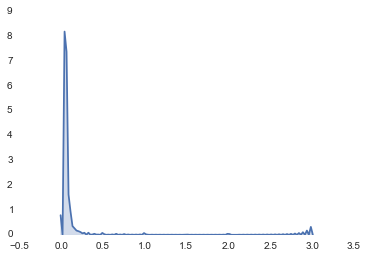

In [127]:
sns.kdeplot(pps, shade=True)

In [128]:
ppso = np.array(aggregate['PointsPerSecondOpponent'])

In [129]:
ppso = np.array([x for x in list(ppso) if x != 0]) #taking out the zeros

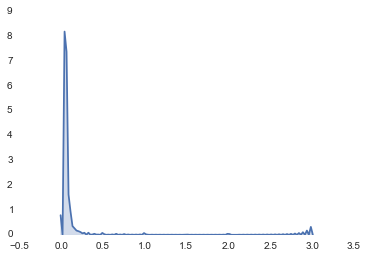

In [130]:
sns.kdeplot(ppso, shade=True)

In [131]:
aggregate['NormalizedObservations'] = aggregate['Observations']/8

In [132]:
els_normal = np.array(aggregate['ElapsedSecs'][aggregate['PointsPerSecond'] != 0])

In [133]:
norm_obs = np.array(aggregate['NormalizedObservations'][aggregate['PointsPerSecond'] != 0])

In [134]:
norm_rtg = np.array(aggregate['OffensiveReboundingRateUnit'][aggregate['PointsPerSecond'] != 0])

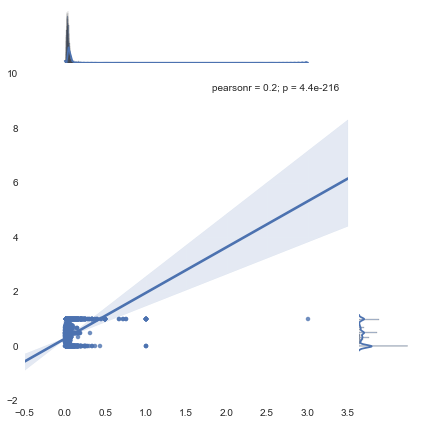

In [135]:
sns.jointplot(x=pps, y = norm_rtg, kind = 'reg')

In [136]:
norm_drtg = np.array(aggregate['DefensiveReboundingRateUnit'][aggregate['PointsPerSecond'] != 0])

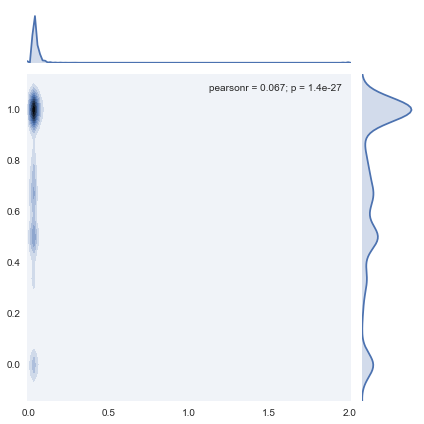

In [137]:
sns.jointplot(x=pps, y=norm_drtg, kind ='kde')

In [138]:
ppsmax = aggregate['PointsPerSecond'][aggregate['ElapsedSecs']>75]

In [139]:
elamed = np.median(aggregate.ElapsedSecs)
ppsmax = aggregate['PointsPerSecond'][aggregate['ElapsedSecs']>elamed]

In [140]:
aggregate['ElapsedSecs'].max()

2580